In [1]:
# importing dependencoes
import pandas as pd

In [2]:
# loading dataset
data = pd.read_csv('BostonHousing.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
# undestanding the statistical data from dataset
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
# checking if there are null values in the dataset
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [5]:
# checking the number of rows and columns of the dataset
data.shape

(506, 14)

In [31]:
# creating a correlation variable fot the dataset
corr = data.corr()

In [11]:
# importing graphic plotting dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<Axes: >

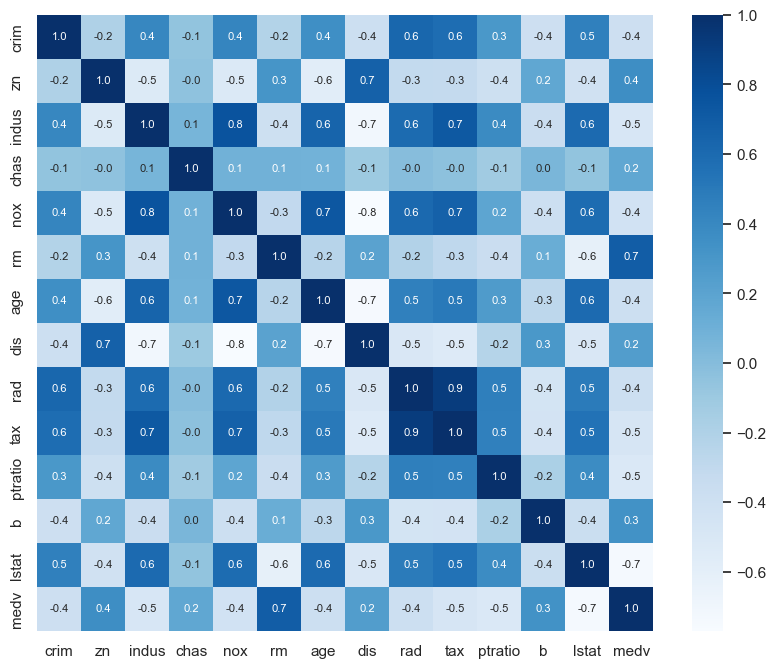

In [58]:
# plotting a correlation figure
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, square=True, cmap='Blues', fmt='.1f', annot_kws={'size': 8 } )

In [33]:
# dividing the dataset in features and target
X = data.drop(columns='medv', axis=1)
y = data['medv']

In [34]:
# spliting the data in train and test
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=2 , )

In [37]:
# importing regressor model
from xgboost import XGBRegressor

In [38]:
# training the model
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [39]:
# predicting the train split
pred = model.predict(X_train)

In [49]:
from sklearn.metrics import r2_score
#Rsquare
score_1 = r2_score(y_train, pred)

#mean absolute error
from sklearn.metrics import mean_absolute_error
score_2 = mean_absolute_error(y_train, pred)

print('R square = ', score_1)
print('Mean absolute error = ', score_2)

R square =  0.9999980039471451
Mean absolute error =  0.0091330346494618


In [51]:
# predicting the test split

pred_test = model.predict(X_test)

In [52]:
score_3 = r2_score(y_test, pred_test)
score_4 = mean_absolute_error(y_test, pred_test)
print('R square = ', score_3)
print('Mean absolute error = ', score_4)


R square =  0.9051721149855378
Mean absolute error =  2.0748727686264927


In [53]:
import matplotlib.pyplot as plt

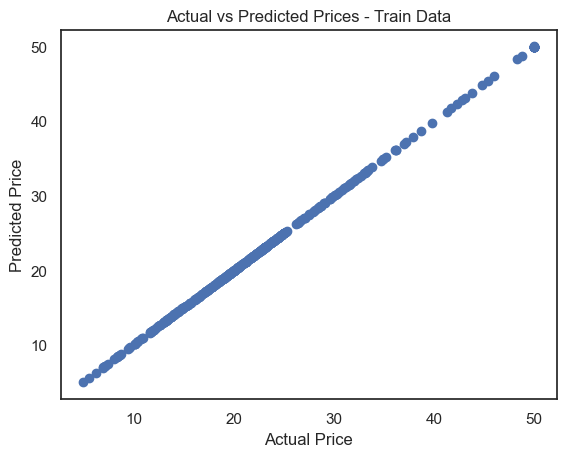

In [56]:
# plotting the Actual Prices vs the Train data
plt.scatter(y_train, pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices - Train Data')
plt.show()

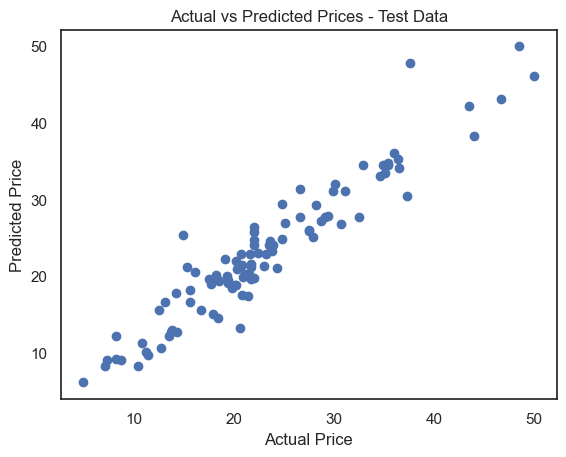

In [57]:
# plotting the Actual data vs Predicted Test
plt.scatter(y_test, pred_test)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices - Test Data')
plt.show()